In [1]:
#binary classification of the model

In [2]:
#images preprocessing is a really important
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 2.7 MB/s eta 0:00:0000:0100:01


In [110]:
import tensorflow as tf
import os

In [111]:
gpus = tf.config.experimental.list_logical_devices('CPU')

In [112]:
import cv2

In [113]:
import imghdr

In [114]:
data_dir = 'data'

In [115]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [116]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [117]:
#verifing the online data by  removing the images manually from folder which are less size and wierd

In [141]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'image not in suitable extension')
                os.remove(image_path)
        except Exception as e:
            print('Issue with image unable to load removing the image')
            os.remove(image_path)

image not in suitable extension
image not in suitable extension
image not in suitable extension
image not in suitable extension
image not in suitable extension


In [142]:
img = cv2.imread(os.path.join(data_dir, 'happy', 'Successful-year.jpg'))

In [143]:
img.shape

(380, 620, 3)

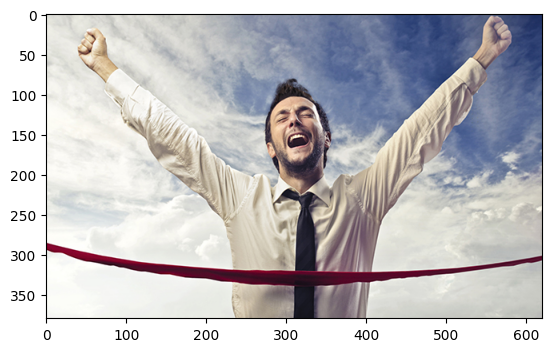

In [144]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

LOAD DATA

In [145]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [146]:
import numpy as np 

In [147]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 269 files belonging to 2 classes.


In [148]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [149]:
batch = data.as_numpy_iterator().next()

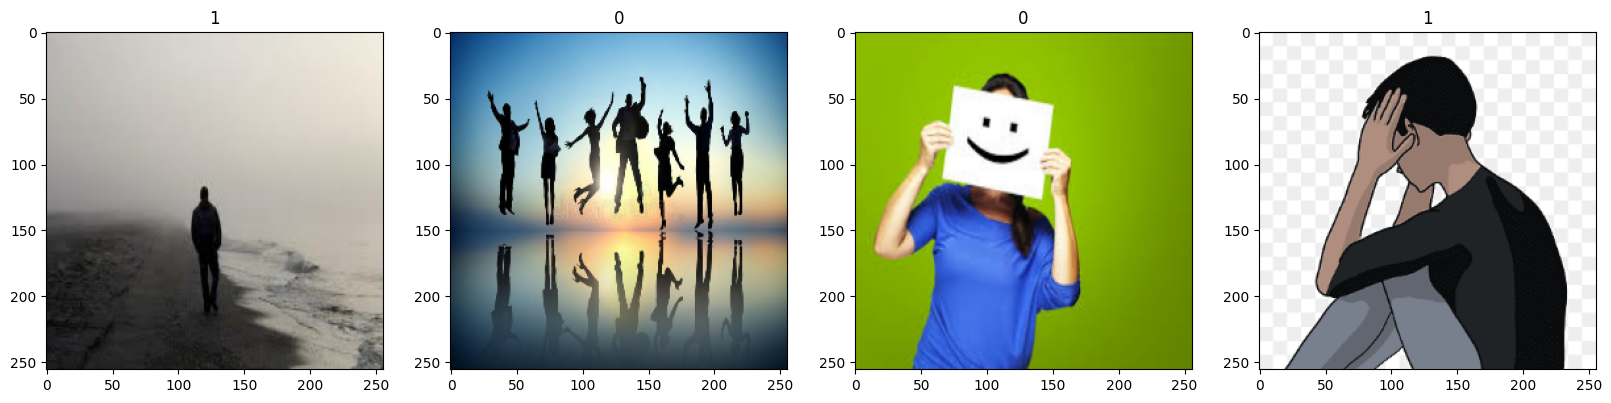

In [150]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
    img = batch[0][idx]
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [151]:
#preprocessing the data, scaling the image values from 0 to 1 and split the data into train, test, validation

In [152]:
#Scale the image data
def scale_image(image, label):
    image = image/255
    return (image,label)

In [153]:
data = data.map(scale_image)

In [154]:
batch = data.as_numpy_iterator().next()
batch[0].shape

(32, 256, 256, 3)

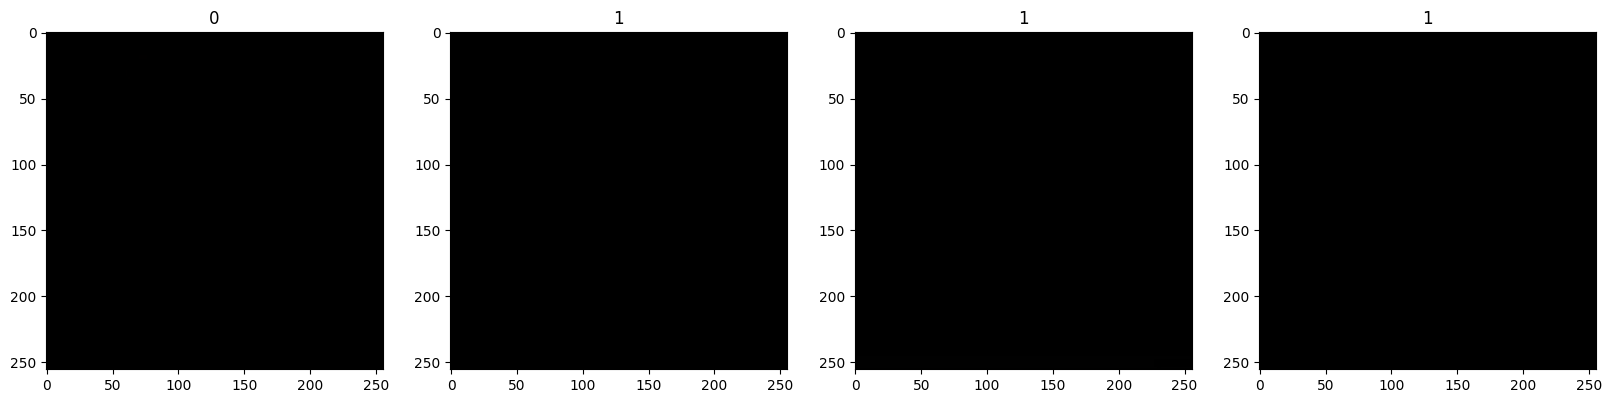

In [155]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
    img = batch[0][idx]
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    #the output will be all dark cause we are using .astype(int) remove this and tyr

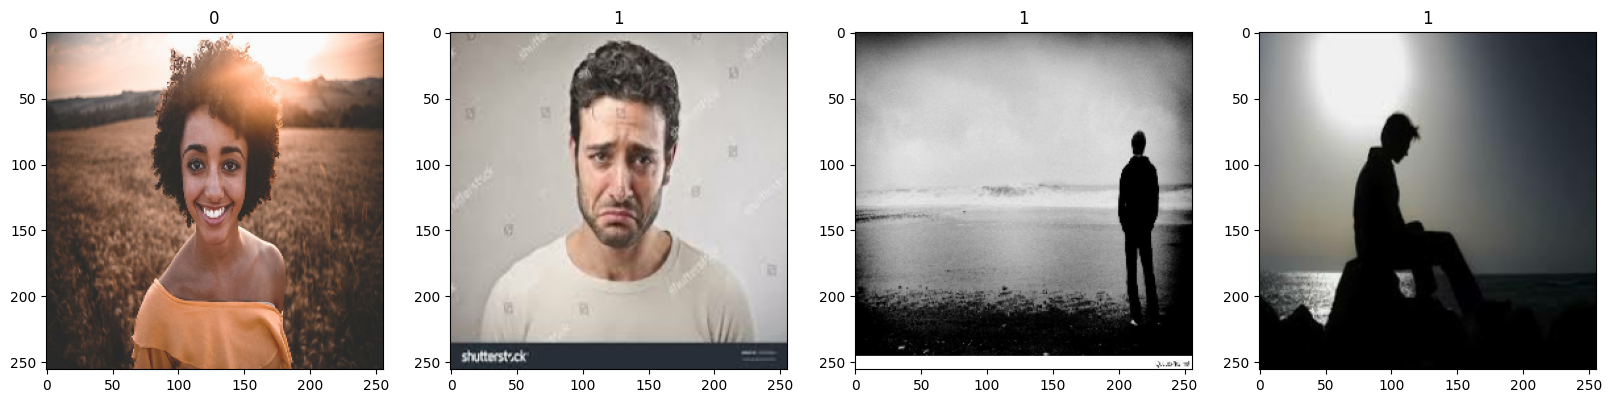

In [156]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [258]:
len(data)

9

In [263]:
#we will be spliting the data now for the train, test, validation
train_size = int(len(data)*0.6)
valid_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)
print(f'{train_size},{valid_size},{test_size}')


5,1,1


In [265]:
#tensor pipeline take, split
train = data.take(train_size)
val = data.skip(train_size).take(valid_size)
test = data.skip(train_size+valid_size-1).take(test_size)
print(f'{len(train)},{len(val)},{len(test)}')

5,1,1


In [266]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,InputLayer

In [284]:
model = Sequential()
model.add(InputLayer(shape=(256, 256, 3)))
model.add(Conv2D(16, 3,1, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, 3,1, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(16, 3,1, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [285]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [286]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 985ms/step - accuracy: 0.4791 - loss: 0.8426 - val_accuracy: 0.5000 - val_loss: 0.6420
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 852ms/step - accuracy: 0.5641 - loss: 0.6150 - val_accuracy: 0.9062 - val_loss: 0.5515
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 817ms/step - accuracy: 0.9148 - loss: 0.5215 - val_accuracy: 0.9062 - val_loss: 0.4278
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 857ms/step - accuracy: 0.8482 - loss: 0.4131 - val_accuracy: 0.9375 - val_loss: 0.2174
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 903ms/step - accuracy: 0.8684 - loss: 0.3595 - val_accuracy: 0.9688 - val_loss: 0.2155
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 0.9155 - loss: 0.2295 - val_accuracy: 0.8750 - val_loss: 0.3091
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 863ms/step - accuracy: 0.9368 - loss: 0.1863 - val_accuracy: 0.8750 - val_loss: 0.1901
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 859ms/step - accuracy: 0.9429 - loss: 0.1590 - val_accuracy: 1.0000 - val_loss:

In [287]:
loss, accuracy = model.evaluate(test)
print(f'loss:{loss}, accuracy:{accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 1.0000 - loss: 0.0133
loss:0.013307313434779644, accuracy:1.0


In [288]:
test_image = cv2.imread(os.path.join('data', 'self_happy.jpg'))

In [289]:
test_image = cv2.resize(test_image, (256,256))
test_image = test_image.astype(float)/255.0
test_image = np.expand_dims(test_image, axis=0)

In [290]:
y_pred = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [291]:
y_pred

array([[0.9225165]], dtype=float32)

In [292]:
def test_build(name):
    image = cv2.imread(os.path.join('data', name))
    image = cv2.resize(image, (256,256))
    image = image.astype(float)/255.0
    image = np.expand_dims(image, axis=0)
    return image

In [293]:
sad_test = test('self_sad.jpg')
sad_test

TypeError: '_TakeDataset' object is not callable

In [294]:
y_pred = model.predict(test_build('download.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [295]:
y_pred

array([[0.7976158]], dtype=float32)

0